# Task 5

In [8]:
# uncompleted codes

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D,MaxPooling2D,Flatten
from keras.optimizers import RMSprop


## write your codes below

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

# at end, you should print for each epoch.

# Then, one can see the accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Given an input image, say digit "5", the network can predict "true" or "false"
# ....


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.2615 - acc: 0.9192 - val_loss: 0.0555 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0844 - acc: 0.9750 - val_loss: 0.0498 - val_acc: 0.9828
Epoch 3/12
60000/60000 [==============================] - 182s 3ms/step - loss: 0.0658 - acc: 0.9808 - val_loss: 0.0395 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0530 - acc: 0.9838 - val_loss: 0.0328 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0468 - acc: 0.9857 - val_loss: 0.0328 - val_acc: 0.9886
Epoch 6/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0407 - acc: 0.9872 - val_loss: 0.0290 - val_acc: 0.9909
E

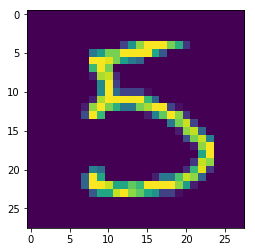

In [23]:
import matplotlib.pyplot as plt
plt.imshow(x_test[15].reshape(28,28))

In [29]:
import numpy as np
np.argmax(model.predict(x_test[15:16]))

5